In [31]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from sklearn import preprocessing
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.cross_decomposition import PLSRegression
import xgboost as xgb
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

In [2]:
directory = os.path.join('sample_data', 'california_housing_train.csv') # Output: sample_data/california_housing_train.csv
datasets = pd.read_csv(directory)

In [3]:
scaler = preprocessing.StandardScaler()

feature_used= datasets.drop(['median_house_value'],axis=1)
label =datasets['median_house_value']

#merubah data
feature_scaled =scaler.fit_transform(feature_used.values)
label_scaled =scaler.fit_transform(label.values.reshape(-1,1)).flatten()

#penentuan data train dan test
feature_train_80, feature_test_20,label_train_80, label_test_20 = train_test_split(feature_scaled, label_scaled, test_size=0.2) # 80% training, 20% testing

# **Linear Regression**

hasil r2 linear regression adalah 41.82% 


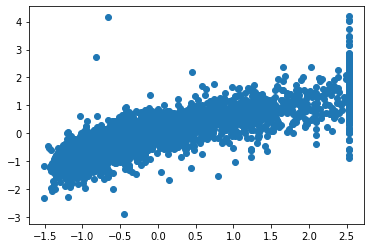

In [ ]:
linear_reg=linear_model.LinearRegression()
linear_reg.fit(feature_train_80,label_train_80)
prediction=linear_reg.predict(feature_test_20)
print("hasil r2 linear regression adalah {}% ".format(round(r2_score(prediction,label_test_20)*100,2))) 
plt.scatter(label_test_20, prediction)

# **Tree**

hasil r2 linear regression adalah 65.62% 


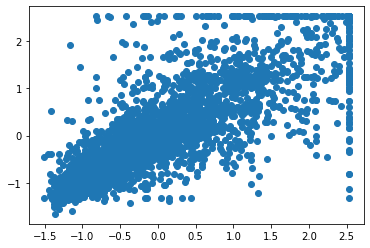

In [ ]:
tree_reg=DecisionTreeRegressor()
tree_reg.fit(feature_train_80,label_train_80)
prediction=tree_reg.predict(feature_test_20)
print("hasil r2 linear regression adalah {}% ".format(round(r2_score(prediction,label_test_20)*100,2))) 
plt.scatter(label_test_20, prediction)

# **Random Forest**

hasil r2 Random Forest adalah 77.52% 


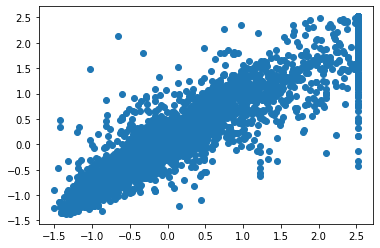

In [ ]:
forest_reg=RandomForestRegressor()
forest_reg.fit(feature_train_80,label_train_80)
prediction=forest_reg.predict(feature_test_20)
print("hasil r2 Random Forest adalah {}% ".format(round(r2_score(prediction,label_test_20)*100,2))) 
plt.scatter(label_test_20, prediction)

# **SVR Dengan ketiga kernel**

In [ ]:
svr_reg   = SVR(kernel='linear', gamma='auto')
svr_rbf   = SVR(kernel='rbf', gamma=0.1, epsilon=.1)
svr_poly  = SVR(kernel='poly', gamma='auto', degree=3, epsilon=.1,coef0=1)

svr_reg.fit(feature_train_80,label_train_80)
svr_rbf.fit(feature_train_80,label_train_80)
svr_poly.fit(feature_train_80,label_train_80)

prediction1=svr_reg.predict(feature_test_20)
print("hasil r2 SVR Kernel Linear adalah {}% ".format(round(r2_score(prediction1,label_test_20)*100,2))) 
# plt.scatter(label_test_20, prediction)

prediction2=svr_rbf.predict(feature_test_20)
print("hasil r2 SVR Kernel rbf adalah {}% ".format(round(r2_score(prediction2,label_test_20)*100,2))) 
# plt.scatter(label_test_20, prediction)

prediction3=svr_poly.predict(feature_test_20)
print("hasil r2 SVR Kernel poly adalah {}% ".format(round(r2_score(prediction3,label_test_20)*100,2))) 
# plt.scatter(label_test_20, prediction)

hasil r2 SVR Kernel Linear adalah 39.45% 
hasil r2 SVR Kernel rbf adalah 65.96% 
hasil r2 SVR Kernel poly adalah 62.49% 


# **Stochastic Gradient Descent(SGD) Regressor**

hasil r2 SGD adalah 42.76% 


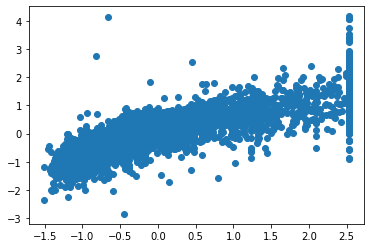

In [ ]:
SGD_reg=SGDRegressor()
SGD_reg.fit(feature_train_80,label_train_80)
prediction=SGD_reg.predict(feature_test_20)
print("hasil r2 SGD adalah {}% ".format(round(r2_score(prediction,label_test_20)*100,2))) 
plt.scatter(label_test_20, prediction)

# **Elastic Net Regression**

hasil r2 Elastic Net adalah -53.01% 


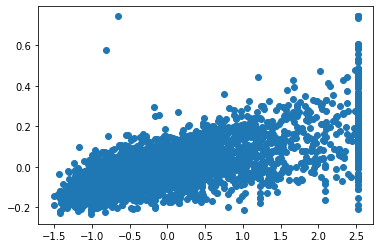

In [ ]:
elastic_reg=ElasticNet()
elastic_reg.fit(feature_train_80,label_train_80)
prediction=elastic_reg.predict(feature_test_20)
print("hasil r2 Elastic Net adalah {}% ".format(round(r2_score(prediction,label_test_20),2))) 
plt.scatter(label_test_20, prediction)

# **Ridge Regression**

hasil r2 Ridge Regression adalah 41.79% 


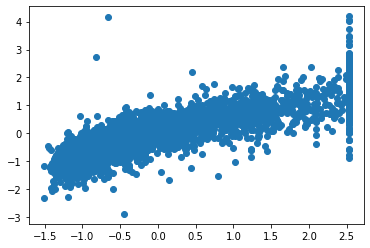

In [ ]:
Rid_reg=Ridge()
Rid_reg.fit(feature_train_80,label_train_80)
prediction=Rid_reg.predict(feature_test_20)
print("hasil r2 Ridge Regression adalah {}% ".format(round(r2_score(prediction,label_test_20)*100,2))) 
plt.scatter(label_test_20, prediction)

# **Lasso Regression**

hasil r2 lasso regression adalah -54.02% 


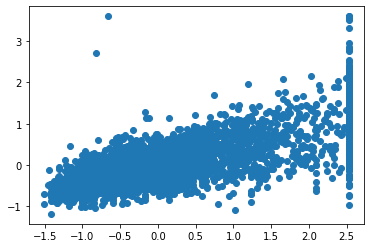

In [ ]:
lasso_reg=linear_model.Lasso(alpha=0.1)
lasso_reg.fit(feature_train_80,label_train_80)
prediction=lasso_reg.predict(feature_test_20)
print("hasil r2 lasso regression adalah {}% ".format(round(r2_score(prediction,label_test_20)*100,2))) 
plt.scatter(label_test_20, prediction)

# **PLS Regression**

hasil r2 PLS regression adalah 11.41% 


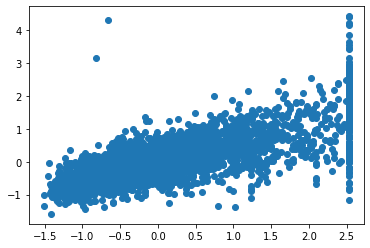

In [ ]:
PLS_reg=PLSRegression()
PLS_reg.fit(feature_train_80,label_train_80)
prediction=PLS_reg.predict(feature_test_20)
print("hasil r2 PLS regression adalah {}% ".format(round(r2_score(prediction,label_test_20)*100,2))) 
plt.scatter(label_test_20, prediction)

# **XGB Regressor**

[06:06:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
hasil r2 XGB regression adalah 82.37% 


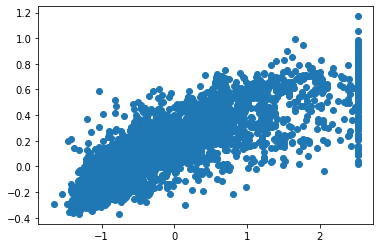

In [33]:
xg_reg =xgb.XGBRegressor(objective='reg:linear',colsample_bytree=0.3,learning_rate=0.1,max_depth=5,alpha=10,n_estimators=10)
xg_reg.fit(feature_train_80,label_train_80)
prediction=xg_reg.predict(feature_test_20)
rmse=np.sqrt(mean_squared_error(label_test_20,prediction))
print("hasil r2 XGB regression adalah {}% ".format(round(rmse*100,2))) 
plt.scatter(label_test_20, prediction)

# **Bayessian Regression**

hasil r2 linear regression adalah 41.77% 


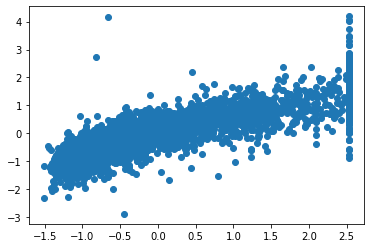

In [ ]:
bayes_reg=linear_model.BayesianRidge()
bayes_reg.fit(feature_train_80,label_train_80)
prediction=bayes_reg.predict(feature_test_20)
print("hasil r2 linear regression adalah {}% ".format(round(r2_score(prediction,label_test_20)*100,2))) 
plt.scatter(label_test_20, prediction)

# **Nearest Neigbohrs Regression**

hasil r2 linear regression adalah 57.79% 


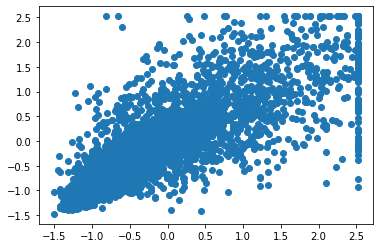

In [ ]:
KNearestN_reg=KNeighborsRegressor(n_neighbors=2)
KNearestN_reg.fit(feature_train_80,label_train_80)
prediction=KNearestN_reg.predict(feature_test_20)
print("hasil r2 linear regression adalah {}% ".format(round(r2_score(prediction,label_test_20)*100,2))) 
plt.scatter(label_test_20, prediction)

# **Neural Network MLP Regression**

hasil r2 linear regression adalah 73.15% 


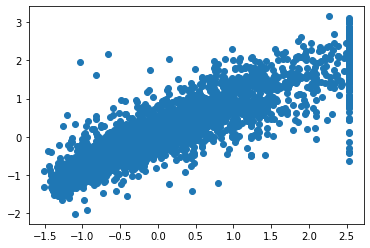

In [ ]:
neural_reg=MLPRegressor(random_state=2, max_iter=500)
neural_reg.fit(feature_train_80,label_train_80)
prediction=neural_reg.predict(feature_test_20)
print("hasil r2 linear regression adalah {}% ".format(round(r2_score(prediction,label_test_20)*100,2))) 
plt.scatter(label_test_20, prediction)